In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

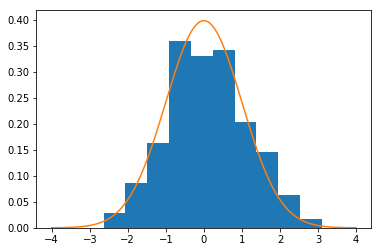

0.0929249066555829 1.1233126776514566


In [4]:
rand = np.random.normal(0,1,300)
plt.hist(rand, bins=10, density=True)
grid = np.linspace(-4,4,100)
plt.plot(grid, 1/np.sqrt(2*np.pi)*np.exp(-.5*grid**2))
plt.show()

print(np.mean(rand),np.var(rand))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/home/phil/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


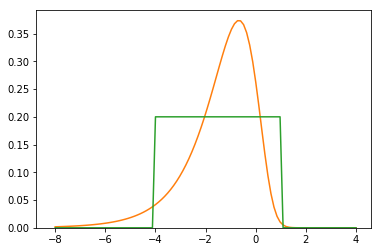

nan nan


/home/phil/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [5]:
def p(x):
    return np.sqrt(2)/np.sqrt(np.pi*(1+(x-1)**2))*np.exp(-.5*(3+2*np.arcsinh(x-1))**2)
# proposal 1
def q(x):
    return 1/np.sqrt(2*np.pi*var)*np.exp(-((x-mean)**2)/2/var)
# proposal 2
def q2(x,a,b):
    arr=np.zeros(len(x))
    for i in range(len(x)):
        if (x[i]>=a and x[i]<=b):
            arr[i] = 1/(b-a)
        else:
            arr[i] =  0
    return arr
mean=-2
var=4
L=1000
a=-4
b=1
x = np.random.normal(mean,np.sqrt(var),L)
w = p(x)/q2(x,a,b)
plt.hist(x,weights=w,bins=50,density=True)
xv = np.linspace(-8,4,100)
plt.plot(xv,p(xv))
plt.plot(xv,q2(xv,a,b))
plt.show()
m=np.sum(x*w)/L
v=np.sum(w*(m-x)**2)/L
print(m,v)

In [8]:
# Markov Chain

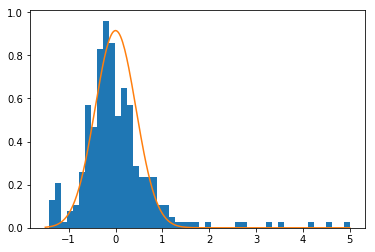

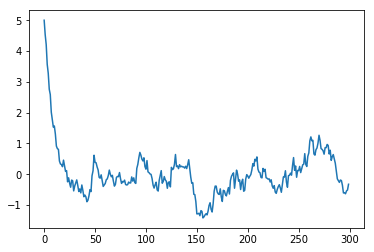

In [6]:
def norm(x):
    return 1/np.sqrt(2*np.pi*var)*np.exp(-((x-mean)**2)/2/var)
n=300
mean=0
var=0.19
samples=np.random.normal(mean,var,n)
x=np.zeros(n)
x[0]=5
for i in range(n-1):
    x[i+1]=0.9*x[i]+samples[i]
plt.hist(x,bins=50,density=True)
xv = np.linspace(-1.5,5,n)
plt.plot(xv,norm(xv))
plt.show()
plt.plot(x)

# Gibbs

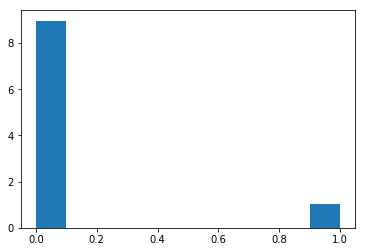

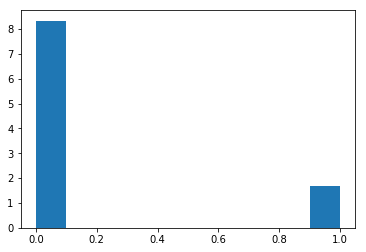

In [32]:
n = 300
A = np.zeros(n)
B = np.zeros(n)
A[0] = 0
B[0] = 0
Pab=0.7*0.1/0.16
Panotb=0.3*0.1/(1-0.16)

for i in range(n-1):
    if(B[i]==1):
        A[i+1] = np.random.binomial(1,Pab)
    else:
        A[i+1] = np.random.binomial(1,Panotb)
        
    if(A[i+1]==1):
        B[i+1] = np.random.binomial(1,0.7)
    else:
        B[i+1] = np.random.binomial(1,0.1)
plt.hist(A,density=True)
plt.show()
plt.hist(B,density=True)
plt.show()

In [ ]:
from scipy.stats import invgamma, t

N = 100
x = np.random.normal(size=N)
y = -3*x + np.random.normal(size=N)*2

a = 2
b = 3
m = 0
l = 1

# analytical solution
s2v = np.linspace(0,10,1000)
wv = np.linspace(-5,5,1000)
mpost = 